# Load and plot audio signal

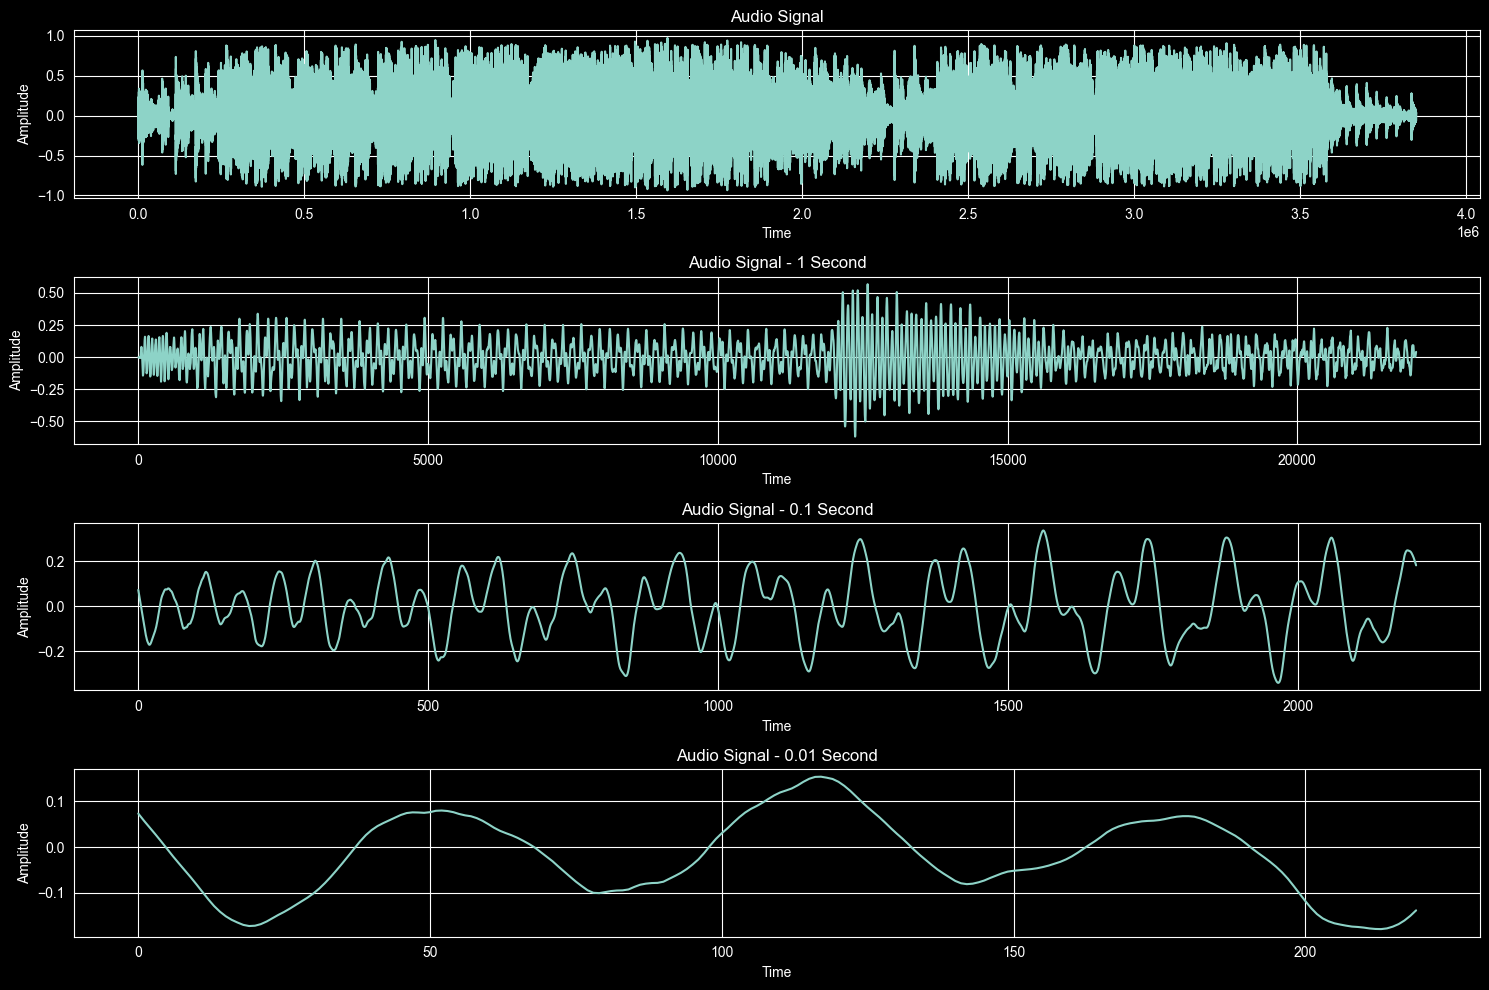

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

sound_sample_file = '../data/01. Talwiinder, NDS, Rippy Grewal - Haseen.mp3'

# load sound file with librosa
signal, sample_rate = librosa.load(sound_sample_file)

# plot 30 sec sample
fig, ax = plt.subplots(nrows=4, figsize=(15, 10))
ax[0].plot(range(len(signal)), signal)
ax[0].set_title('Audio Signal')
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('Time')

# plot 1 sec sample
signal_sample = signal[:sample_rate]
ax[1].plot(range(len(signal_sample)), signal_sample)
ax[1].set_title('Audio Signal - 1 Second')
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('Time')

# plot 0.1 sec sample
signal_short = signal[500:500+sample_rate//10]
ax[2].plot(range(len(signal_short)), signal_short)
ax[2].set_title('Audio Signal - 0.1 Second')
ax[2].set_ylabel('Amplitude')
ax[2].set_xlabel('Time')

# plot 0.01 sec sample
signal_very_short = signal[500:500+sample_rate//100]
ax[3].plot(range(len(signal_very_short)), signal_very_short)
ax[3].set_title('Audio Signal - 0.01 Second')
ax[3].set_ylabel('Amplitude')
ax[3].set_xlabel('Time')

plt.tight_layout()
plt.show()

# Load Spectogram

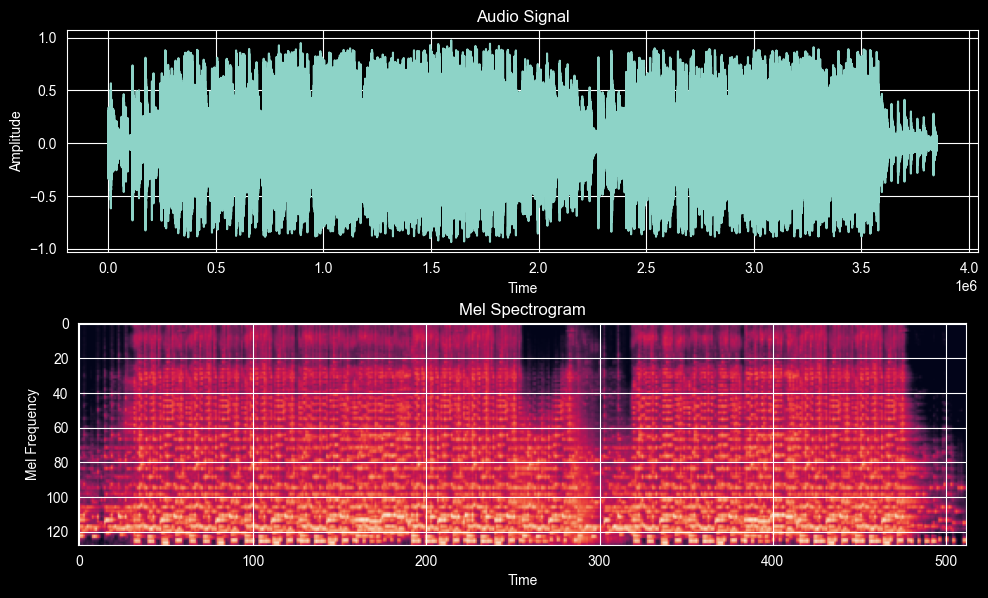

In [2]:
from pyarrow import feather
from skimage.transform import resize

signal, sample_rate = librosa.load(sound_sample_file)

mels = librosa.power_to_db(librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=128, fmax=8000), ref=np.max)
mel_image = (((80+mels)/80)*255)
mel_image = np.flip(mel_image, axis=0)
mel_image = resize(mel_image, (128, 512)).astype(np.uint8)

fig,  ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(range(len(signal)), signal)
ax[0].set_title('Audio Signal')
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('Time')

ax[1].imshow(mel_image)
ax[1].set_title('Mel Spectrogram')
ax[1].set_ylabel('Mel Frequency')
ax[1].set_xlabel('Time')

plt.tight_layout()
plt.show()


# Create a Dataframe with song file names and paths

In [14]:
import os
import pandas as pd

# path for the songs folder
folder_path = '../data'
files = os.listdir(folder_path)

# filter and create a list of dictionaries
song_data = []
for file in files:
    if file.endswith(('.mp3', '.wav', '.flac')):
        path = os.path.join(folder_path, file)

        signal, sample_rate = librosa.load(path, duration=10)
        mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=128, fmax=8000)
        mel_spec_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

        song_data.append({
            'file_name': file,
            'file_path': os.path.join(folder_path, file),
            'audio_data': mel_spec_db
        })

# convert to a df
df = pd.DataFrame(song_data)
print(df.head())

                                           file_name  \
0          01 - 5 Seconds of Summer - Youngblood.mp3   
1  01 - Aaron Smith - Dancin (feat. Luvli) (Krono...   
2               01 - Adele - Rolling in the Deep.mp3   
3                      01 - Akshath - nadaaniyan.mp3   
4                  01 - AP Dhillon - Brown Munde.mp3   

                                           file_path  \
0  ../data\01 - 5 Seconds of Summer - Youngblood.mp3   
1  ../data\01 - Aaron Smith - Dancin (feat. Luvli...   
2       ../data\01 - Adele - Rolling in the Deep.mp3   
3              ../data\01 - Akshath - nadaaniyan.mp3   
4          ../data\01 - AP Dhillon - Brown Munde.mp3   

                                          audio_data  
0  [[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...  
1  [[-80.0, -80.0, -80.0, -80.0, -80.0, -79.81626...  
2  [[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...  
3  [[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...  
4  [[-70.6213, -65.95659, -60.434742, -54.83877, ..

# Exploratory Data Analysis of Audio Data

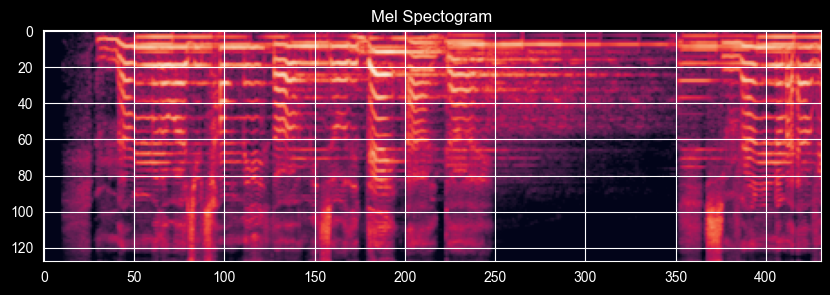

In [16]:
# plot mel spectrogram of the first song
fig, ax = plt.subplots(figsize=(15, 3))
plt.title('Mel Spectogram')
plt.imshow(df.iloc[0]['audio_data'])

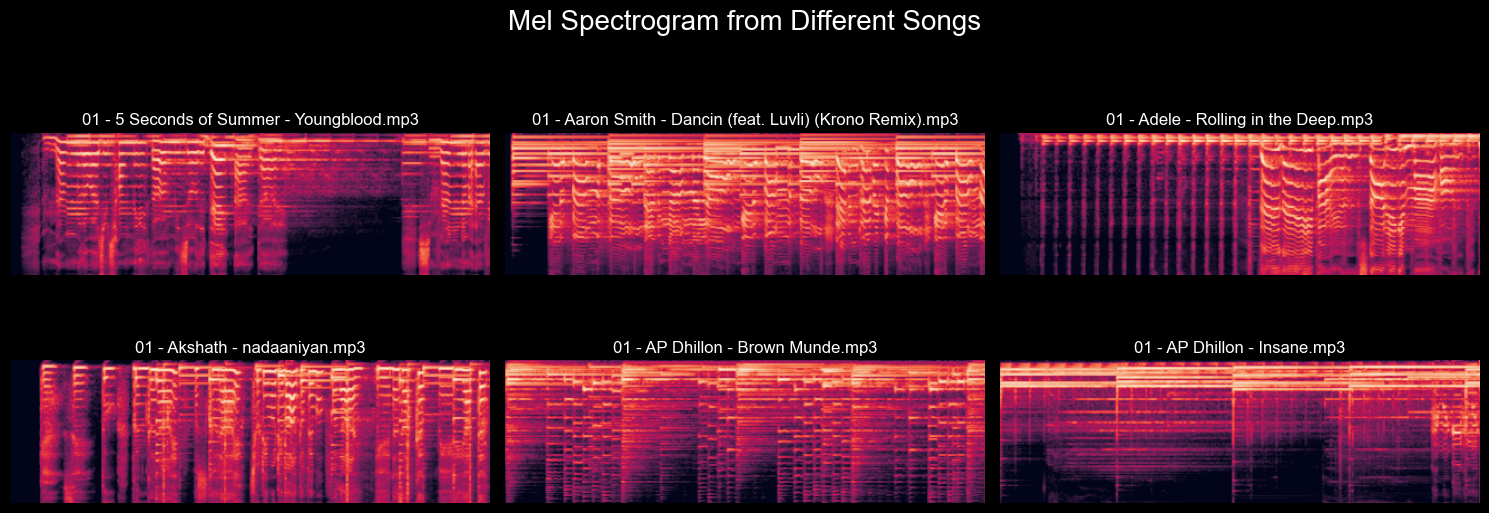

In [37]:
import math

# plot mel spectrogram from Different Songs
cols = 3
num_songs = 6
rows = math.ceil(num_songs / cols)
fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(15, rows*3))

ax_flat = ax.flatten()
plt.suptitle('Mel Spectrogram from Different Songs', fontsize=20)

i = -1
for i in range(num_songs):
    data = df.iloc[i]['audio_data']
    ax_flat[i].imshow(data)
    ax_flat[i].axis('off')
    ax_flat[i].set_title(df.iloc[i]['file_name'])

for j in range(i + 1, len(ax_flat)):
    ax_flat[j].axis('off')

plt.tight_layout()
plt.show()

# Encoder-Decoder Model for Audio Denoising

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

